In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from math import sqrt

In [4]:
# importation du dataset
diabete_data = pd.read_csv('../../datasets/diabetes.csv')

In [71]:
# diabete_data.loc[(diabete_data["Insulin"].isnull()) | (diabete_data["SkinThickness"].isnull()) | (diabete_data["BMI"].isnull())]

In [21]:
# on compte le nombre de valeur manquante pour chaque colonne
# diabete_data.isnull().sum()

In [5]:
# pretraitement du datatset: on va remplacer les valeurs 0 par la moyenne des valeurs de leur champ
for column in diabete_data.iloc[:, 0:6]:
    diabete_data[column] = diabete_data[column].replace(0, np.nan)
    mean = diabete_data[column].mean(skipna=True)
    diabete_data[column] = diabete_data[column].replace(np.nan, mean)

In [6]:
# creation de nos données d'entrée (X) et de nos données cible (Y)
X = diabete_data.iloc[:, 0:8]
Y = diabete_data.iloc[:, 8]

In [7]:
# division du dataset en des données d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [57]:
std = x_train["Glucose"].std()
mean = x_train["Glucose"].mean()
x = x_train["Glucose"].values[0]
z = (x-mean)/std
z

0.9369389448423614

In [18]:
# # on va standardiser ie normaliser nos données
# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train) # il ne faut pas oublier d'ajouter le fit_ car on manipule des données d'entrainement, sinon il y'aura une erreur
# x_test = sc_X.transform(x_test)

In [25]:
# determination de la valeur optimal de k
# Methode 1:
# --Etape1: on calcule la racine carré de la taille total de notre data point (y_test)
# --Etape2: en fonction de la valeur obtenue à l'etape1, on choisie une valeur impaire de k (tu peux te referer au chiffre après la virgule pour voir si tu dois choisir la valeur impaire superieur ou la valeur impaire inferieur)
# pour  eviter toute confusion entre 2 classe de données par ce que qu'avec une valeur impaire on est sûr que 2 classes de données n'auront jamais le même nombre de point de données. 
sqrt(len(y_test))
# donc ici la valeur optimal de k est 15

15.198684153570664

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean') # p: c'est l'hyper paramètre qui definit la metric qu'on veut utiliser. Si c'est 1 c'est Manhattan, si c'est 2 c'est Euclidienne.
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8566108007448789

In [85]:
knn.score(x_test, y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7316017316017316

In [10]:
y_predict = knn.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

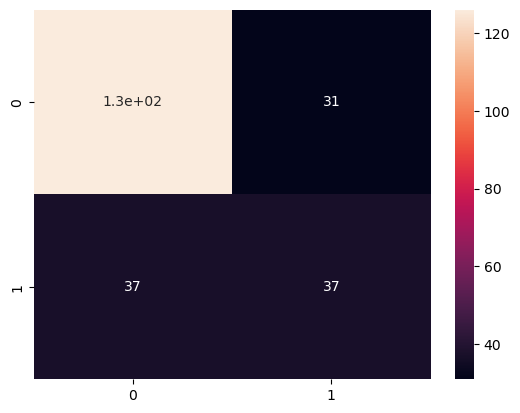

In [13]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

In [87]:
f1_score(y_test, y_predict)

0.5866666666666667

In [88]:
accuracy_score(y_test, y_predict)

0.7316017316017316

In [79]:
# on va standardiser ie normaliser nos données
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train) # il ne faut pas oublier d'ajouter le fit_ car on manipule des données d'entrainement, sinon il y'aura une erreur
x_test = sc_X.transform(x_test)
x_train[19]

array([-0.01272801, -0.50751191,  0.24930428, -0.02059486, -0.02680539,
        1.79998848,  0.6425647 , -0.80638406])